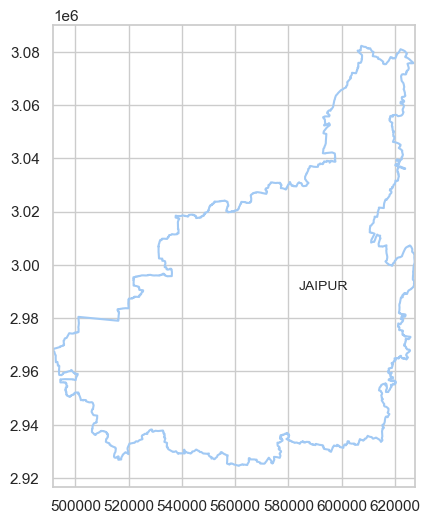

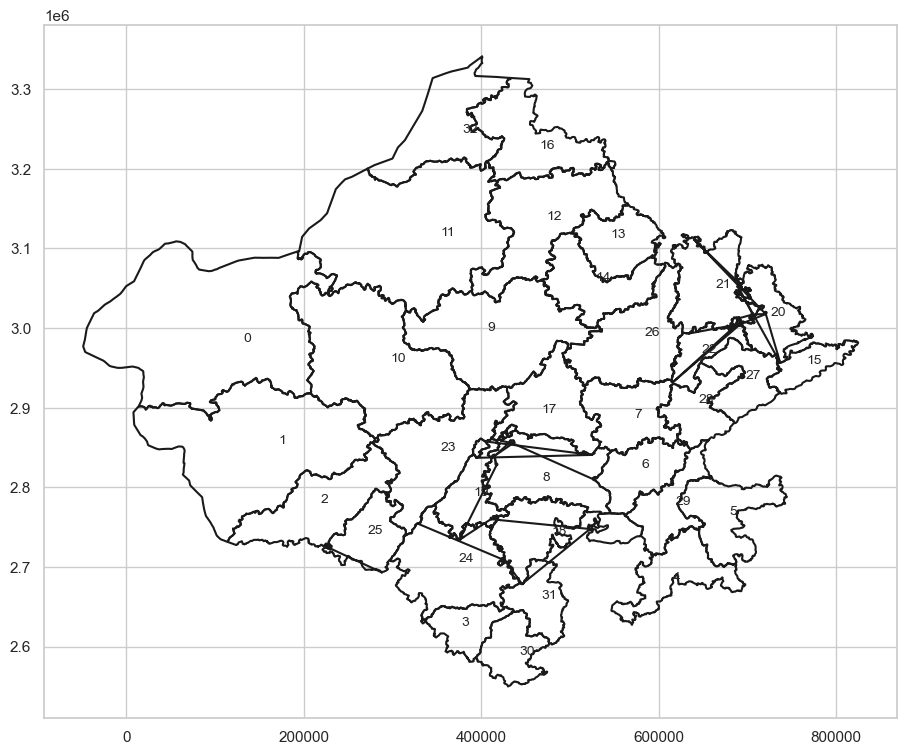

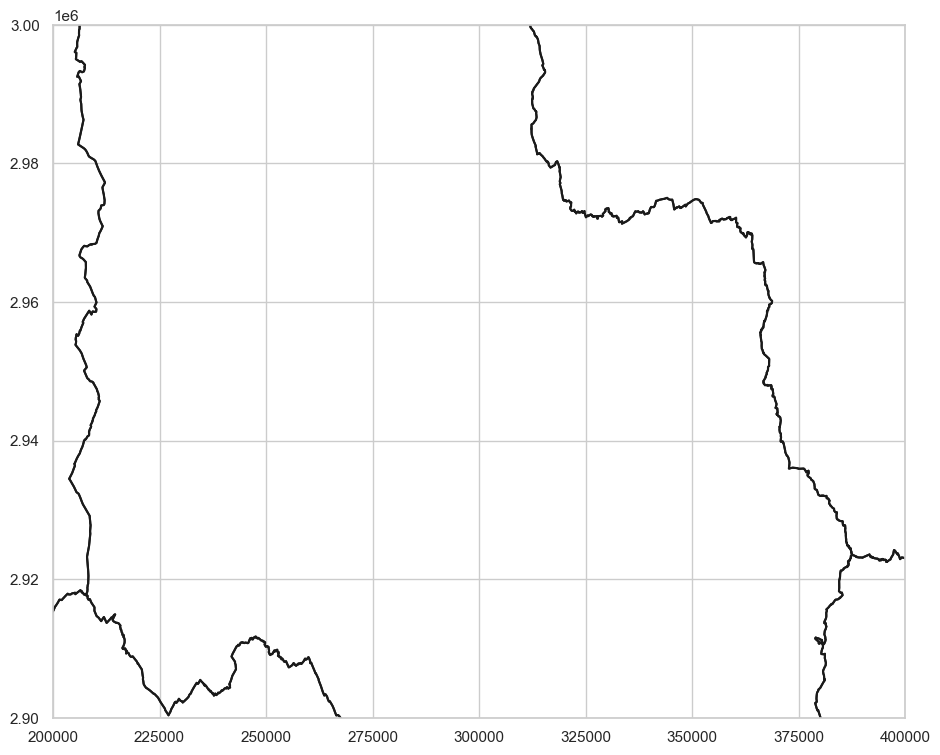

In [14]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns


def read_shapefile(sf):
    #fetching the headings from the shape file
    fields = [x[0] for x in sf.fields][1:]
#fetching the records from the shape file
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
#converting shapefile data into pandas dataframe
    df = pd.DataFrame(columns=fields, data=records)
#assigning the coordinates
    df = df.assign(coords=shps)
    return df


def plot_shape(id, s=None):
    plt.figure()
    #plotting the graphical axes where map ploting will be done
    ax = plt.axes()
    ax.set_aspect('equal')
#storing the id number to be worked upon
    shape_ex = sf.shape(id)
#NP.ZERO initializes an array of rows and column with 0 in place of each elements 
    #an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    x_lon = np.zeros((len(shape_ex.points),1))
#an array will be generated where number of rows will be(len(shape_ex,point))and number of columns will be 1 and stored into the variable
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
#plotting using the derived coordinated stored in array created by numpy
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
# use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0


sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))
#opening the vector map
shp_path = "District_boundary\\District_Boundary.shp"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)
len(sf.shapes())
sf.records()
df = read_shapefile(sf)
df.shape
DIST_NAME = 'JAIPUR'
#to get the id of the city map to be plotted
com_id = df[df.DIST_NAME == 'JAIPUR'].index[0]
plot_shape(com_id, DIST_NAME)
sf.shape(com_id)
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
#calling the function and passing required parameters to plot the full map
plot_map(sf)
y_lim = (2900000,3000000) # latitude
x_lim = (200000, 400000) # longitude
plot_map(sf, x_lim, y_lim)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# set the filepath and load
fp = "settlements.geojson"
#reading the file stored in variable fp
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# for i in range(len(map_df)):
#     map_df[i].properties['weight'] = 0
print(type(map_df))
# map_df.plot()
import geojson
with open(fp) as f:
    gj = geojson.load(f)
    for i in range(len(gj)):
        gj[i].properties['weight'] = '0'
print(gj[0].properties)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'ekatte': '00014', 'nuts4': 'BLG52', 'nuts3': 'BLG', 'weight': '0'}


In [79]:
import requests

cookies = {
    's': 'icrwky2l1ezxx25n2snootmt',
    'f': 'ZmfyDK5cFkbXM0VC5Fsb8-zW_HZruclnQrCBbSHEvHO-vs3deFZHmJfmnn-a-_VaCMoFdR2PYsKYiYJgxPmxQqvSxE-Rbf51tAwK6kPHC5c1',
    '_ga': 'GA1.1.200309698.1718794410',
    '_ga_NND5XHM53W': 'GS1.1.1718800686.2.0.1718800686.0.0.0',
}

headers = {
    'Accept': 'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
    # 'Cookie': 's=icrwky2l1ezxx25n2snootmt; f=ZmfyDK5cFkbXM0VC5Fsb8-zW_HZruclnQrCBbSHEvHO-vs3deFZHmJfmnn-a-_VaCMoFdR2PYsKYiYJgxPmxQqvSxE-Rbf51tAwK6kPHC5c1; _ga=GA1.1.200309698.1718794410; _ga_NND5XHM53W=GS1.1.1718800686.2.0.1718800686.0.0.0',
    'Origin': 'https://portal.seea.government.bg',
    'Referer': 'https://portal.seea.government.bg/bg/Map',
    'Sec-Fetch-Dest': 'image',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Google Chrome";v="125", "Chromium";v="125", "Not.A/Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
}

response = requests.get(
    'https://portal.seea.government.bg/Proxy.ashx?url=http://192.168.128.138:8080/geoserver/AUER/wms&SERVICE=WMS&VERSION=1.1.1&REQUEST=GetMap&FORMAT=image%2Fpng&TRANSPARENT=true&STYLES=&LAYERS=AUER%3Abk_object&SRS=EPSG%3A32635&WIDTH=1161&HEIGHT=946&BBOX=-112943.70162612441%2C4449940.177449831%2C596208.667392817%2C5027768.033687486',
    cookies=cookies,
    headers=headers,
)
f = open("demofile.txt", "bw")
f.write(response.content)
print(response.content)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [4]:
import requests
import pandas as pd
import openpyxl
import csv  


# header = ['ime', 'obshtina', 'moshtnost']
# with open('allFtEC.csv', 'w', encoding='UTF8', newline='') as f:
#     writer = csv.writer(f)
#     writer.writerow(header)
        
        

enumYear = ["2022_2024","2018_2022","2015_2018","2012_2015"]

cookies = {
    '_ga': 'GA1.1.200309698.1718794410',
    'f': 'Jka6L-aJWp7IcjI4y14MavveMUetU9LT2EuivlWpaYiNL6V9_DsCbHgd-sFXP_1kj8rLuBjjqkrDmN1ap0kI8hx78qd-A1PNOHu9OROAS4A1',
    's': 'en35uhoi2zh45jh54prizz4v',
    '_ga_NND5XHM53W': 'GS1.1.1718886005.5.1.1718886550.0.0.0',
}

headers = {
    'Accept': '*/*',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
    'Content-Type': 'application/json; charset=utf-8',
    # 'Cookie': '_ga=GA1.1.200309698.1718794410; f=Jka6L-aJWp7IcjI4y14MavveMUetU9LT2EuivlWpaYiNL6V9_DsCbHgd-sFXP_1kj8rLuBjjqkrDmN1ap0kI8hx78qd-A1PNOHu9OROAS4A1; s=en35uhoi2zh45jh54prizz4v; _ga_NND5XHM53W=GS1.1.1718886005.5.1.1718886550.0.0.0',
    'Referer': 'https://portal.seea.government.bg/bg/Map',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
    'sec-ch-ua': '"Google Chrome";v="125", "Chromium";v="125", "Not.A/Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
}
dataframe = openpyxl.load_workbook("garancii.xlsx")
dataframe1 = dataframe.active

In [27]:
ID =320
stop = 0
replace = False
exceptions = list()
while(ID<18700):

    
    params = {
        'objectId': str(ID),
        'layer': 'AUER:bk_object',
    }

    response = requests.get(
        'https://portal.seea.government.bg/bg/Map/GetObjectInfo/',
        params=params,
        cookies=cookies,
        headers=headers,
    )
    if(str(response.content.decode('utf8')).split(' ')[0].strip()=="<!DOCTYPE"):
        ID=ID+1
        continue
        
    f = open("demo.txt", "w")
    # for word in str(response.content).split(' '):
    #     print(word)
    #     if('\\xd0' in str(word)):
    #         print("da")
    #         word = word.replace("\\\\",'\\')
    #         word = word.encode('latin1').decode('utf8')
    #         print(word)
    f.write(response.content.decode('utf8'))
    f.close()
    fTEC = False
    LinesToDate=-1
    with open("demo.txt", 'r') as file:
        for line in file:
            if("ФтЕЦ" in line):
                serch =line.replace("&quot;","\"").strip()
                
                fTEC = True
    if(fTEC==False):
        ID = ID+1
        continue
    found =0
    if(replace==True):
        replace = False
        serch = serch.replace('-', " - ")
    print(ID)
    for i in range(1, dataframe1.max_row+1):
        
        cell_obj = dataframe1.cell(row=i, column=5)
        if(str(cell_obj.value)==serch):
            print("Row ", i, " data :")
            ime = serch
            obshtina = str(dataframe1.cell(row=i, column=7).value).split(",")[1].strip()
            moshtnost = dataframe1.cell(row=i, column=8).value
            print(str(ime),obshtina,moshtnost, end=" ")
            print("\n")
            found =1
            stop = 0
            break
    if(stop==5):
        exceptions.append(ID)
        print(serch)
        ID = ID +1
        continue
    if(found==0):
        print("ERROR! NO DATA FOUND!")
        stop= stop +1
        replace = True
        continue
    
    # header = ['ime', 'obshtina', 'moshtnost']
    data = [ime, obshtina, moshtnost]
    # trqbva da ima zashtita ako ne nameri suvpadenie da ne pishe starata stoinost
    with open('allFtEC.csv', 'a', encoding='UTF8') as f:
        writer = csv.writer(f)
        # write the data
        writer.writerow(data)
    ID= ID +1
print("DONE!")
print(exceptions)

320
ERROR! NO DATA FOUND!
320
ERROR! NO DATA FOUND!
320
ERROR! NO DATA FOUND!
320
ERROR! NO DATA FOUND!
320
ERROR! NO DATA FOUND!
320
ФтЕЦ "Грийненерджи Винарско 1"
321
Row  718  data :
ФтЕЦ "Грийненерджи Винарско 2" община Камено 1.8 

322
Row  1917  data :
ФтЕЦ "Грийн Електрик - Първомай" община Първомай 0.1974 

323
Row  125  data :
ФтЕЦ "Раброво" община Бойница 0.462 

324
Row  243531  data :
ФтЕЦ "Грий Пауър - Жребино 2" община Елхово 0.0816 

325
Row  243433  data :
ФтЕЦ "Грий Пауър - Жребино 1" община Елхово 0.0816 

326
Row  941  data :
ФтЕЦ "Грейн - Айтос" община Айтос 0.15 

327
Row  2892  data :
ФтЕЦ "Стражица - 1" община Стражица 0.08648 

329
Row  141574  data :
ФтЕЦ "Давидов" община Джебел 0.08 

330
Row  471  data :
ФтЕЦ "ДАГ - 08" община Димитровград 2.34 

331
Row  1678  data :
ФтЕЦ "Данов - Тамарино" община Стралджа 0.063 

332
Row  1926  data :
ФтЕЦ "Могилино - 2" община Две могили 0.1 

333
Row  249761  data :
ФтЕЦ "Данев - Сливен" община Сливен 0.02961 

334
Row  2

In [5]:

AlastExceptions = list()
exceptions = [320, 387, 554, 1311, 5356, 5366, 5390, 5455, 5457, 5458, 5460, 5462, 5463, 5464, 5531, 5906, 5913, 5972, 5973, 6235, 6304, 6343, 6352, 6387, 6389, 6514, 6633, 6848, 6860, 6899, 7061, 7288, 7388, 7844, 7868, 8138, 8171, 8413, 8443, 8527, 8575, 8592, 8595, 8960, 8988, 9041, 9080, 9307, 9313, 9468, 9677, 9693, 9754, 9755, 9779, 9780, 9881, 9884, 9960, 10015, 10029, 10065, 10081, 10131, 10141, 10179, 10192, 10202, 10208, 10209, 10236, 10248, 10257, 10266, 10270, 10281, 10304, 10341, 10394, 10406, 10422, 10465, 10467, 10471, 10502, 10506, 10507, 10510, 10523, 10528, 10536, 10537, 10542, 10545, 10547, 10549, 10550, 10573, 10589, 10593, 10616, 10629, 10640, 10653, 10655, 10703, 10704, 10707, 10711, 10720, 10722, 10727, 10729, 10731, 10751, 10781, 10793, 10795, 10798, 10800, 10801, 10802, 10804, 10805, 10806, 10807, 10808, 10809, 10810, 10811, 10812, 10813, 10814, 10815, 10816, 10817, 10818, 10819, 10820, 10859, 10873, 10881, 10888, 10920, 10924, 10975, 11015, 11016, 11017, 11034, 11046, 11053, 11054, 11055, 11064, 11112, 11114, 11115, 11117, 11123, 11125, 11130, 11153, 11168, 11187, 11188, 11189, 11195, 11208, 11209, 11214, 11217, 11218, 11225, 11237, 11238, 11256, 11277, 11304, 11305, 11317, 11324, 11334, 11342, 11400, 11401, 11404, 11410, 11455, 11464, 11465, 11473, 11489, 11492, 11526, 11529, 11543, 11563, 11593, 11600, 11601, 11608, 11620, 11621, 11712, 11716, 11723, 11780, 11782, 11794, 11837, 11853, 11885, 11892, 11919, 11924, 11952, 12027, 12050, 12056, 12064, 12065, 12066, 12078, 12079, 12081, 12152, 12166, 12229, 12235, 12244, 12245, 12272, 12294, 12314, 12329, 12342, 12346, 12360, 12364, 12426, 12429, 12442, 12444, 12462, 12477, 12514, 12515, 12564, 12589, 12667, 12680, 12734, 12773, 12820, 12863, 12867, 12911, 12922, 12925, 12928, 12936, 12941, 12962, 12970, 13005, 13015, 13028, 13037, 13084, 13088, 13089, 13139, 13155, 13159, 13223, 13275, 13308, 13310, 13327, 13358, 13394, 13396, 13407, 13424, 13431, 13442, 13445, 13471, 13501, 13511, 13514, 13519, 13524, 13527, 13533, 13540, 13545, 13561, 13564, 13565, 13566, 13568, 13570, 13588, 13605, 13609, 13611, 13620, 13621, 13622, 13625, 13629, 13638, 13652, 13660, 13661, 13662, 13670, 13673, 13676, 13677, 13689, 13691, 13694, 13705, 13706, 13732, 13739, 13743, 13758, 13761, 13762, 13802, 13814, 13815, 13845, 13855, 13858, 13875, 13878, 13883, 13909, 13919, 13934, 13942, 13946, 13978, 13979, 13980, 13996, 13998, 14014, 14058, 14078, 14087, 14092, 14095, 14101, 14102, 14103, 14108, 14112, 14118, 14147, 14150, 14151, 14152, 14153, 14154, 14155, 14156, 14188, 14193, 14194, 14218, 14226, 14231, 14246, 14255, 14257, 14258, 14265, 14329, 14357, 14369, 14376, 14394, 14518, 14560, 14561, 14596, 14598, 14613, 14630, 14642, 14644, 14650, 14651, 14659, 14666, 14681, 14686, 14730, 14761, 14870, 14890, 14931, 14944, 14954, 14960, 14964, 14965, 14998, 15017, 15086, 15089, 15165, 15179, 15207, 15224, 15230, 15266, 15279, 15283, 15284, 15306, 15418, 15419, 15421, 15433, 15491, 15492, 15498, 15512, 15596, 15642, 15691, 15700, 15731, 15750, 15762, 15770, 15771, 15772, 15790, 15791, 15801, 15805, 15816, 15817, 15850, 15939, 15954, 15975, 16009, 16071, 16120, 16133, 16135, 16141, 16149, 16152, 16160, 16164, 16174, 16176, 16178, 16182, 16183, 16187, 16192, 16193, 16196, 16209, 16210, 16215, 16220, 16228, 16229, 16241, 16242, 16243, 16258, 16270, 16275, 16276, 16277, 16300, 16315, 16316, 16326, 16327, 16328, 16329, 16331, 16344, 16346, 16348, 16351, 16352, 16355, 16377, 16380, 16386, 16387, 16392, 16396, 16412, 16415, 16417, 16419, 16426, 16427, 16428, 16429, 16430, 16449, 16450, 16451, 16457, 16462, 16465, 16466, 16469, 16482, 16484, 16499, 16501, 16502, 16507, 16512, 16513, 16517, 16518, 16519, 16520, 16523, 16525, 16528, 16537, 16543, 16544, 16546, 16557, 16558, 16561, 16563, 16584, 16588, 16590, 16592, 16593, 16594, 16595, 16598, 16609, 16610, 16611, 16615, 16616, 16617, 16621, 16622, 16624, 16626, 16627, 16628, 16631, 16633, 16635, 16637, 16641, 16648, 16652, 16658, 16667, 16669, 16670, 16671, 16678, 16680, 16697, 16698, 16707, 16708, 16711, 16713, 16716, 16717, 16720, 16724, 16726, 16732, 16737, 16738, 16739, 16744, 16745, 16748, 16750, 16752, 16753, 16757, 16758, 16760, 16766, 16770, 16778, 16781, 16782, 16783, 16784, 16794, 16795, 16797, 16798, 16799, 16800, 16802, 16803, 16807, 16808, 16813, 16814, 16829, 16831, 16832, 16833, 16834, 16837, 16839, 16842, 16846, 16847, 16851, 16852, 16855, 16857, 16858, 16860, 16864, 16865, 16866, 16867, 16868, 16869, 16871, 16872, 16874, 16879, 16880, 16881, 16883, 16889, 16894, 16896, 16900, 16903, 16904, 16905, 16906, 16907, 16908, 16909, 16912, 16913, 16916, 16918, 16919, 16920, 16921, 16923, 16925, 16926, 16927, 16928, 16929, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16944, 16945, 16949, 16950, 16952, 16956, 16958, 16960, 16961, 16969, 16975, 16976, 16980, 16981, 16987, 16993, 16996, 16997, 17000, 17001, 17002, 17010, 17011, 17013, 17019, 17024, 17025, 17028, 17033, 17034, 17035, 17037, 17038, 17040, 17042, 17044, 17045, 17049, 17053, 17054, 17055, 17056, 17060, 17062, 17066, 17068, 17071, 17077, 17079, 17084, 17086, 17087, 17088, 17089, 17090, 17092, 17093, 17094, 17095, 17096, 17098, 17099, 17100, 17101, 17102, 17103, 17105, 17107, 17108, 17114, 17116, 17117, 17118, 17121, 17122, 17124, 17125, 17126, 17127, 17132, 17134, 17135, 17139, 17141, 17142, 17146, 17148, 17150, 17151, 17153, 17154, 17156, 17157, 17161, 17163, 17168, 17169, 17170, 17171, 17172, 17173, 17175, 17176, 17178, 17179, 17180, 17181, 17192, 17198, 17204, 17206, 17207, 17209, 17211, 17213, 17215, 17217, 17218, 17219, 17221, 17223, 17224, 17225, 17226, 17228, 17231, 17232, 17233, 17234, 17237, 17240, 17241, 17245, 17250, 17251, 17254, 17256, 17257, 17258, 17259, 17260, 17261, 17265, 17266, 17267, 17269, 17270, 17273, 17275, 17276, 17277, 17278, 17281, 17283, 17284, 17285, 17286, 17289, 17290, 17292, 17297, 17301, 17304, 17305, 17306, 17307, 17308, 17309, 17310, 17313, 17314, 17317, 17318, 17319, 17320, 17321, 17323, 17325, 17326, 17329, 17330, 17331, 17333, 17334, 17336, 17337, 17339, 17340, 17341, 17342, 17352, 17353, 17354, 17355, 17356, 17357, 17360, 17363, 17364, 17365, 17367, 17371, 17374, 17375, 17377, 17378, 17379, 17381, 17382, 17383, 17391, 17401, 17404, 17405, 17410, 17414, 17416, 17436, 17452, 17466, 17468, 17469, 17477, 17480, 17481, 17486, 17487, 17494, 17495, 17496, 17499, 17508, 17510, 17521, 17529, 17543, 17547, 17549, 17550, 17554, 17556, 17565, 17569, 17573, 17577, 17584, 17600, 17605, 17624, 17642, 17648, 17649, 17671, 17672, 17674, 17681, 17686, 17687, 17688, 17696, 17697, 17713, 17718, 17723, 17735, 17749, 17772, 17774, 17776, 17801, 17804, 17820, 17828, 17829, 17837, 17845, 17846, 17855, 17872, 17874, 17878, 17928, 17929, 17930, 17932, 17933, 17935, 17937, 17938, 17942, 17949, 17956, 17957, 17958, 17965, 17966, 17970, 17985, 17992, 17993, 17999, 18002, 18005, 18008, 18009, 18015, 18018, 18019, 18020, 18028, 18029, 18034, 18035, 18044, 18051, 18053, 18064, 18068, 18070, 18075, 18076, 18077, 18078, 18079, 18084, 18100, 18101, 18104, 18109, 18110, 18113, 18118, 18125, 18128, 18129, 18130, 18136, 18137, 18138, 18139, 18141, 18143, 18150, 18156, 18163, 18172, 18177, 18179, 18180, 18182, 18183, 18185, 18186, 18188, 18189, 18190, 18191, 18192, 18199, 18201, 18205, 18207, 18209, 18210, 18215, 18217, 18225, 18233, 18237, 18240, 18241, 18242, 18243, 18244, 18252, 18259, 18265, 18266, 18268, 18269, 18270, 18273, 18274, 18289, 18323, 18349, 18361, 18362, 18392, 18433, 18455, 18460, 18472, 18482, 18483, 18493, 18514, 18540, 18541, 18549, 18551, 18552, 18553, 18554, 18555, 18558, 18559, 18560, 18561, 18562, 18563, 18564, 18566, 18570, 18572, 18573, 18575, 18588, 18589, 18590, 18591, 18593, 18599, 18600, 18601, 18602, 18603, 18607, 18608, 18612, 18613, 18614, 18618, 18620, 18624, 18625]

for e in range(0,len(exceptions)-1):
    params = {
        'objectId': str(exceptions[e]),
        'layer': 'AUER:bk_object',
    }

    response = requests.get(
        'https://portal.seea.government.bg/bg/Map/GetObjectInfo/',
        params=params,
        cookies=cookies,
        headers=headers,
    )
 
        
    f = open("demo.txt", "w")
    # for word in str(response.content).split(' '):
    #     print(word)
    #     if('\\xd0' in str(word)):
    #         print("da")
    #         word = word.replace("\\\\",'\\')
    #         word = word.encode('latin1').decode('utf8')
    #         print(word)
    f.write(response.content.decode('utf8'))
    f.close()
    LinesToDate=-1
    with open("demo.txt", 'r') as file:
        for line in file:
            if("ФтЕЦ" in line):
                unfiltered = line.replace("&quot;","\"").replace("\"","").replace("\'","").replace(" ","")
                serch =line.replace("&quot;","\"").replace("\"","").replace("\'","").replace(" ","").replace("-","").replace("&#39;","").replace("\\","").replace(".","").replace("&amp;","").replace(",","").replace("(","").replace(")","").replace("*","").replace(":","").replace("“","").replace("„","").strip().lower()
                

    found =0
    print(e)
    for i in range(1, dataframe1.max_row+1):
        
        cell_obj = dataframe1.cell(row=i, column=5)
        serchNum = any(chr.isdigit() for chr in serch)
        cellNum = any(chr.isdigit() for chr in str(cell_obj.value))
        if(serch in str(cell_obj.value).replace("\"","").replace("\'","").replace(" ","").replace("-","").replace("\\","").replace(".","").replace(",","").replace("(","").replace(")","").replace("*","").replace(":","").replace("“","").replace("„","").strip().lower()and serchNum==cellNum):
            print("Row ", i, " data :")
            ime = str(cell_obj.value)
            obshtina = str(dataframe1.cell(row=i, column=7).value).split(",")[1].strip()
            moshtnost = dataframe1.cell(row=i, column=8).value
            print(str(ime),obshtina,moshtnost, end=" ")
            print("\n")
            found =1
            break

    if(found==0):
        print("ERROR! NO DATA FOUND!")
        print(serch)
        print(unfiltered)
        AlastExceptions.append(exceptions[e])
        continue
    
    # header = ['ime', 'obshtina', 'moshtnost']
    data = [ime, obshtina, moshtnost]
    print(data)
    # trqbva da ima zashtita ako ne nameri suvpadenie da ne pishe starata stoinost
    with open('allFtEC.csv', 'a', encoding='UTF8') as f:
        writer = csv.writer(f)
        # write the data
        writer.writerow(data)
print("DONE!")
print(AlastExceptions)
print(len(AlastExceptions))

0
ERROR! NO DATA FOUND!
фтецгрийненердживинарско1
1
Row  3823  data :
ФтЕЦ "Паисиево" община Дулово 0.0977 

['ФтЕЦ "Паисиево"', 'община Дулово', 0.0977]
2
ERROR! NO DATA FOUND!
фтецекопауъргруп
3
ERROR! NO DATA FOUND!
фтецтополовопиви
4
Row  27288  data :
ФтЕЦ "Биотерм - Сусам" община Минерални бани 0.03 

['ФтЕЦ "Биотерм - Сусам"', 'община Минерални бани', 0.03]
5
Row  21341  data :
ФтЕЦ "Ватковски 3" община Искър 0.03 

['ФтЕЦ "Ватковски 3"', 'община Искър', 0.03]
6
Row  42834  data :
ФтЕЦ "Къща Анелия - Кърджали'' община Кърджали 0.005 

['ФтЕЦ "Къща Анелия - Кърджали\'\'', 'община Кърджали', 0.005]
7
Row  21341  data :
ФтЕЦ "Ватковски 3" община Искър 0.03 

['ФтЕЦ "Ватковски 3"', 'община Искър', 0.03]
8
Row  21341  data :
ФтЕЦ "Ватковски 3" община Искър 0.03 

['ФтЕЦ "Ватковски 3"', 'община Искър', 0.03]
9
Row  21341  data :
ФтЕЦ "Ватковски 3" община Искър 0.03 

['ФтЕЦ "Ватковски 3"', 'община Искър', 0.03]
10
Row  21341  data :
ФтЕЦ "Ватковски 3" община Искър 0.03 

['ФтЕЦ "Ватко

In [7]:
import pandas as pd
import openpyxl
import csv

enumYear = ["2022_2024","2018_2022","2015_2018","2012_2015"]
LinesToDate=-1
with open("demo1.txt", 'r') as file:
    for line in file:
        if("ФтЕЦ" in line):
            serch =line.replace("&quot;","\"").strip()
        if("Дата на въвеждане (по протокол, разрешение или др.):" in line):
            LinesToDate = 3
        if(LinesToDate>0):LinesToDate = LinesToDate-1
        elif(LinesToDate==0):
            createYear = int(line.split(".")[2].replace(" ","").replace("г",""))
            # print(createYear)
            LinesToDate= LinesToDate-1  
found =0
if(createYear>2011 and createYear<2025):
    if(createYear<2015 and createYear>2011):
        dataframe = openpyxl.load_workbook("Регистър издадени гаранции"+str(enumYear[3])+".xlsx")
        dataframe1 = dataframe.active
        k =3
    elif(createYear<2018 and createYear>2014):
        dataframe = openpyxl.load_workbook("Регистър издадени гаранции"+str(enumYear[2])+".xlsx")
        dataframe1 = dataframe.active
        k=2
    elif(createYear<2022 and createYear>2017):
        dataframe = openpyxl.load_workbook("Регистър издадени гаранции"+str(enumYear[1])+".xlsx")
        dataframe1 = dataframe.active
        k=1
    elif(createYear<2025 and createYear>2021):
        dataframe = openpyxl.load_workbook("Регистър издадени гаранции"+str(enumYear[0])+".xlsx")
        dataframe1 = dataframe.active
        k=0
    for i in range(1, dataframe1.max_row+1):
            
            cell_obj = dataframe1.cell(row=i, column=5)
            if(str(cell_obj.value)==serch):
                print("Row ", i, " data :")
                ime = serch
                obshtina = str(dataframe1.cell(row=i, column=7).value).split(",")[1].strip()
                moshtnost = dataframe1.cell(row=i, column=8).value
                print(enumYear[k])
                print(str(ime),obshtina,moshtnost, end=" ")
                print("\n")
                found =1
                break
if(found==0):
    for j in range(0,4):
        if(found==1):break
        dataframe = openpyxl.load_workbook("Регистър издадени гаранции"+str(enumYear[j])+".xlsx")
        dataframe1 = dataframe.active
        
        for i in range(1, dataframe1.max_row+1):
            
            cell_obj = dataframe1.cell(row=i, column=5)
            if(str(cell_obj.value)==serch):
                print("Row ", i, " data :")
                ime = serch
                obshtina = str(dataframe1.cell(row=i, column=7).value).split(",")[1].strip()
                moshtnost = dataframe1.cell(row=i, column=8).value
                print(enumYear[j])
                print(str(ime),obshtina,moshtnost, end=" ")
                print("\n")
                found =1
                break
        print(j)

# header = ['ime', 'obshtina', 'moshtnost']
data = [ime, obshtina, moshtnost]
# trqbva da ima zashtita ako ne nameri suvpadenie da ne pishe starata stoinost
# with open('allFtEC.csv', 'a', encoding='UTF8') as f:
#     writer = csv.writer(f)
#     # write the data
#     writer.writerow(data)


2012
Row  7154  data :
2012_2015
ФтЕЦ "АБС - Строй" община Харманли 0.1008 



In [7]:
import csv
with open('allFtEC.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(str(lines).replace("[","").replace('\'','').split(',')[0])

ime
ФтЕЦ "Община Раковски - ДГ Синчец"


In [9]:
import csv 
header = ['ime', 'obshtina', 'moshtnost']
with open('allFtEC.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)




1124
